In [56]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from regressors import stats
sns.set(style='whitegrid' ,  context = 'notebook')

In [21]:
df = pd.read_csv('insurance.csv')
df
 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


(1338, 7)


<Axes: >

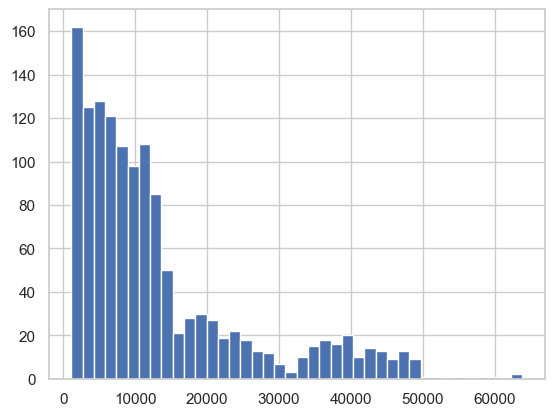

In [7]:
print(df.shape)
df.charges.hist(bins = 40)

In [13]:
#df[df.charges>50000]
df[df.charges<50000]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


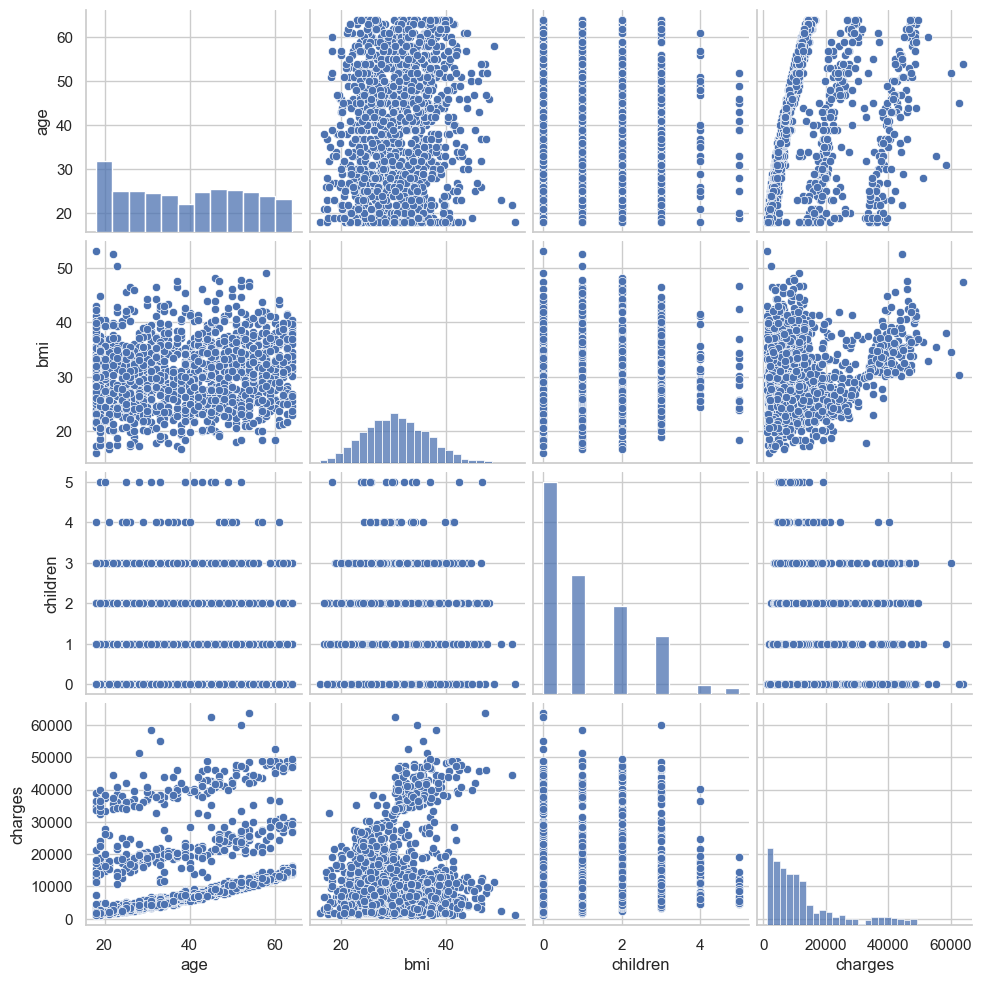

In [23]:
sns.pairplot(df, height=2.5)
plt.show()


<Axes: >

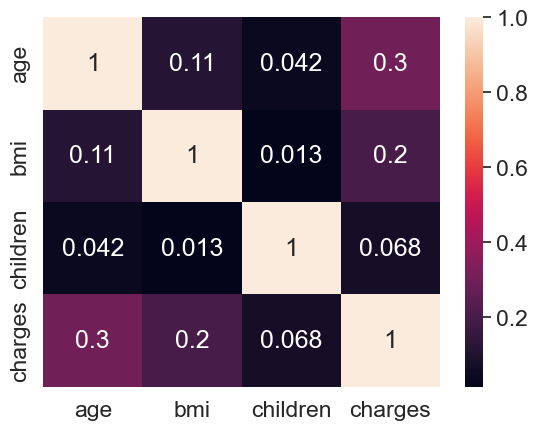

In [27]:
columnas_numericas = ['age', 'bmi', 'children', 'charges']
cm = np.corrcoef(df[columnas_numericas].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True, yticklabels=columnas_numericas, xticklabels=columnas_numericas)

In [31]:
df = pd.get_dummies(df, columns=['sex','smoker','region'], drop_first=True)
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [63]:
X_cols = list(set(df.columns)-set(['charges']))
y_cols = ['charges']

X = df[X_cols].values
y = df[y_cols].values

X_train, X_test, y_train, y_test = train_test_split(X,y)

sc_X = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [43]:
y_pred.shape

(335, 1)

In [50]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print('r2', r2)
print('mse:', mse)

r2 0.755509231028059
mse: 0.2602520565312794


In [64]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [67]:
y_test = y_test.reshape(-1)

print("==========Resultado==========")
stats.summary(model, X_test, y_test, X_cols)

==========Resultado==========
Residuals:
    Min      1Q  Median     3Q    Max
-1.9928 -0.0895  0.0833 0.2474 1.0016


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept        0.006532    0.028807   0.2267  0.820772
region_northwest -0.005030    0.034197  -0.1471  0.883156
region_southwest -0.025474    0.033953  -0.7503  0.453619
sex_male         -0.006605    0.028822  -0.2292  0.818884
region_southeast -0.020621    0.035073  -0.5879  0.556964
bmi               0.153170    0.029065   5.2699  0.000000
children          0.051251    0.028235   1.8151  0.070399
age               0.306756    0.029079  10.5489  0.000000
smoker_yes        0.812045    0.027909  29.0961  0.000000
---
R-squared:  0.71747,    Adjusted R-squared:  0.71053
F-statistic: 103.48 on 8 features


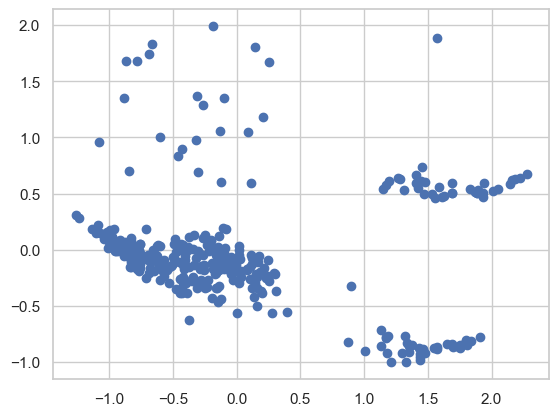

In [71]:
residuales = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuales)

In [107]:
df_2 = df.copy()
df_2['age2'] = df_2.age**2
df_2['sobrepeso'] = (df_2.bmi >= 30).astype(int)
df_2['sobrepeso*fumado'] = df_2.sobrepeso * df_2.smoker_yes

In [165]:
X_cols = ['sobrepeso*fumado', 'smoker_yes', 'age2', 'children']
y_col = ['charges']

X = df_2[X_cols].values
y = df_2[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X,y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression(fit_intercept=False)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [166]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))


r2  0.8746
mse:  0.1302


In [167]:
model.coef_ = model.coef_.reshape(-1)

In [168]:
y_test = y_test.reshape(-1)

print("==========Summary==========")
stats.summary(model, X_test, y_test, X_cols)

==========Summary==========
Residuals:
    Min     1Q  Median     3Q   Max
-1.9736 0.0687  0.1083 0.1393 0.389


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept        0.000000    0.019770   0.0000  1.000000
sobrepeso*fumado  0.494942    0.024102  20.5349  0.000000
smoker_yes        0.455528    0.023234  19.6058  0.000000
age2              0.312103    0.019291  16.1789  0.000000
children          0.073639    0.020527   3.5874  0.000384
---
R-squared:  0.87460,    Adjusted R-squared:  0.87308
F-statistic: 575.38 on 4 features


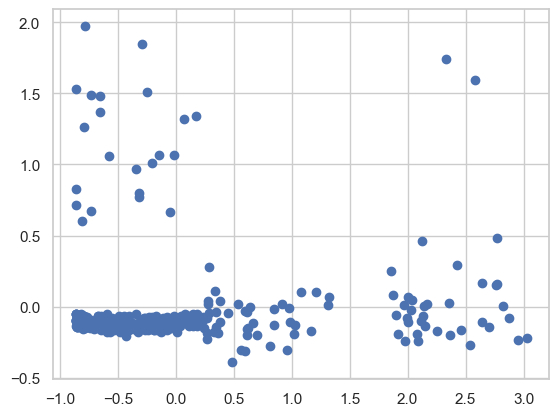

In [169]:
residuales  = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuales)
plt.show()
